In [18]:
from typing import List, Tuple

import matplotlib.pyplot as plt

from Experiment import Experiment
from ExperimentalConfig import ExperimentalConfig
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h
from elections.Candidate import Candidate



def build_h2h():
    config = ExperimentalConfig("H2H",
                                10000,
                                1.5, .7, 21, 512, 3, 20000, 2048, 400, 400, "exp/h2h-0")
    config.save()
    exp = Experiment(config)
    return exp.run_strategic_races_core(1000)
h2h_wc = build_h2h()

    0 w.ideology: -0.01024
  100 w.ideology: -0.02938
  200 w.ideology: 0.05392
  300 w.ideology: 0.001188
  400 w.ideology: -0.04614
  500 w.ideology: -0.03449
  600 w.ideology: 0.02541
  700 w.ideology: -0.1535
  800 w.ideology: -0.1711
  900 w.ideology: -0.08365


In [2]:
def build_irv():
    config = ExperimentalConfig("IRV",
                                10000,
                                1.5, .7, 21, 512, 3, 20000, 2048, 400, 400, "exp/irv-0")
    config.save()
    exp = Experiment(config)
    return exp.run_strategic_races_core(1000)
irv_wc = build_irv()

    0 w.ideology: 0.6379
  100 w.ideology: 0.3011
  200 w.ideology: 0.5456
  300 w.ideology: 0.5433
  400 w.ideology: 0.4689
  500 w.ideology: 0.5216
  600 w.ideology: 0.5398
  700 w.ideology: 0.5787
  800 w.ideology: -0.6129
  900 w.ideology: -0.4505


In [3]:
import numpy as np
def plot_results(results: List[List[float]], title: str, labels: List[str]):
    n_rows = 1
    n_cols = 1
    fig, axis = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
    fig.suptitle(title, color="black", fontsize=22)
    fig.set_facecolor("white")

    count = 0
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    axis.tick_params(axis='x', colors="black")
    axis.tick_params(axis='y', colors="black")
    axis.set_xlim([-1, 1])

    bins = np.arange(-1, 1, 2/21)
    axis.hist(results, bins=bins, label=labels, edgecolor='white', stacked=True)
    axis.legend()
    axis.set_xlabel("Sigma From Origin", fontsize=20)
    axis.set_ylabel("Frequency of Winner at Ideology", fontsize=20)

    plt.savefig("foo.png")

In [23]:
def results_for_candidate(results: List[Tuple[Candidate, List[Candidate]]], candidate_name: str, wins_only: bool):
    ideologies = []
    for w, cc in results:
        if wins_only and w.name == candidate_name:
            ideologies.append(w.ideology.vec[0])
        elif not wins_only:
            for c in cc:
                if c.name == candidate_name:
                    ideologies.append( c.ideology.vec[0] )

    print(f"found {len(ideologies)} results")
    return ideologies

found 268 results
found 117 results
found 352 results
found 138 results
found 125 results
found 0 results
found 408 results
found 2 results
found 296 results
found 294 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results


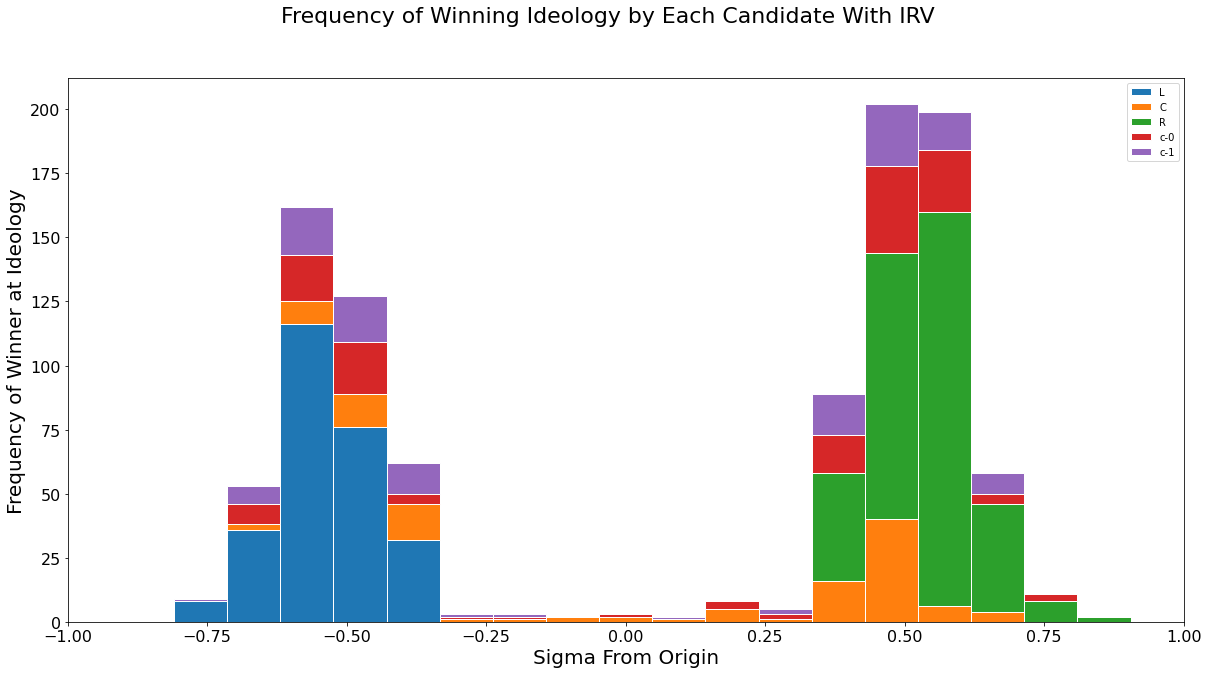

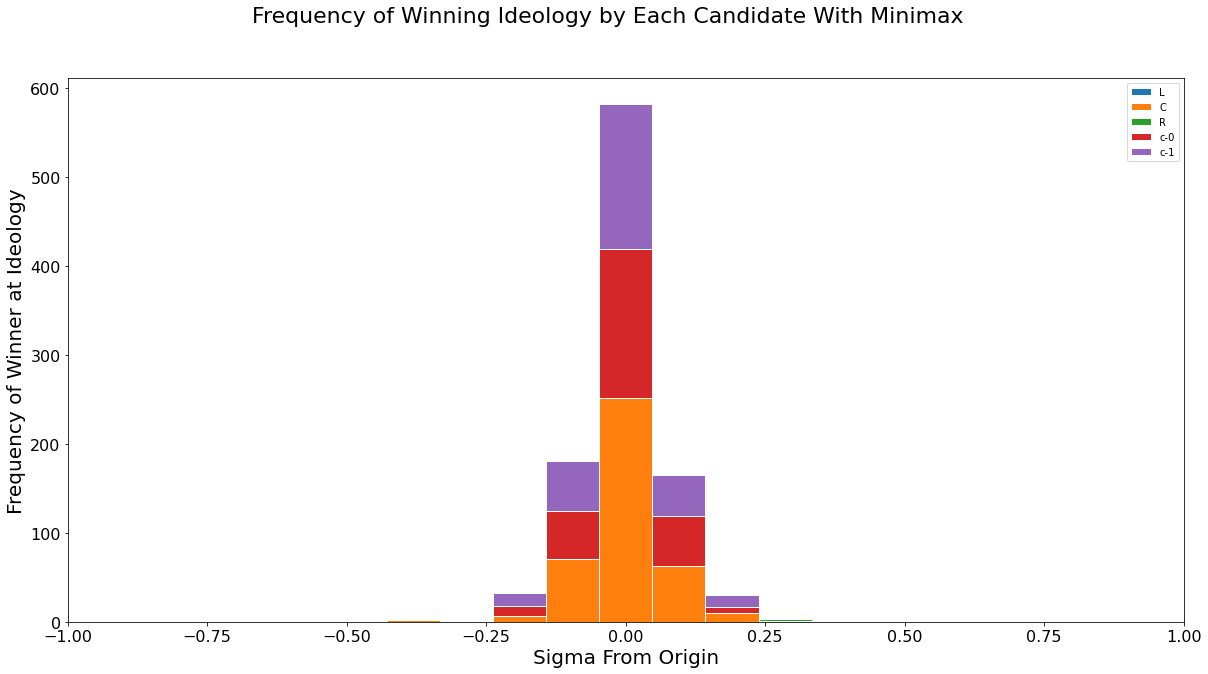

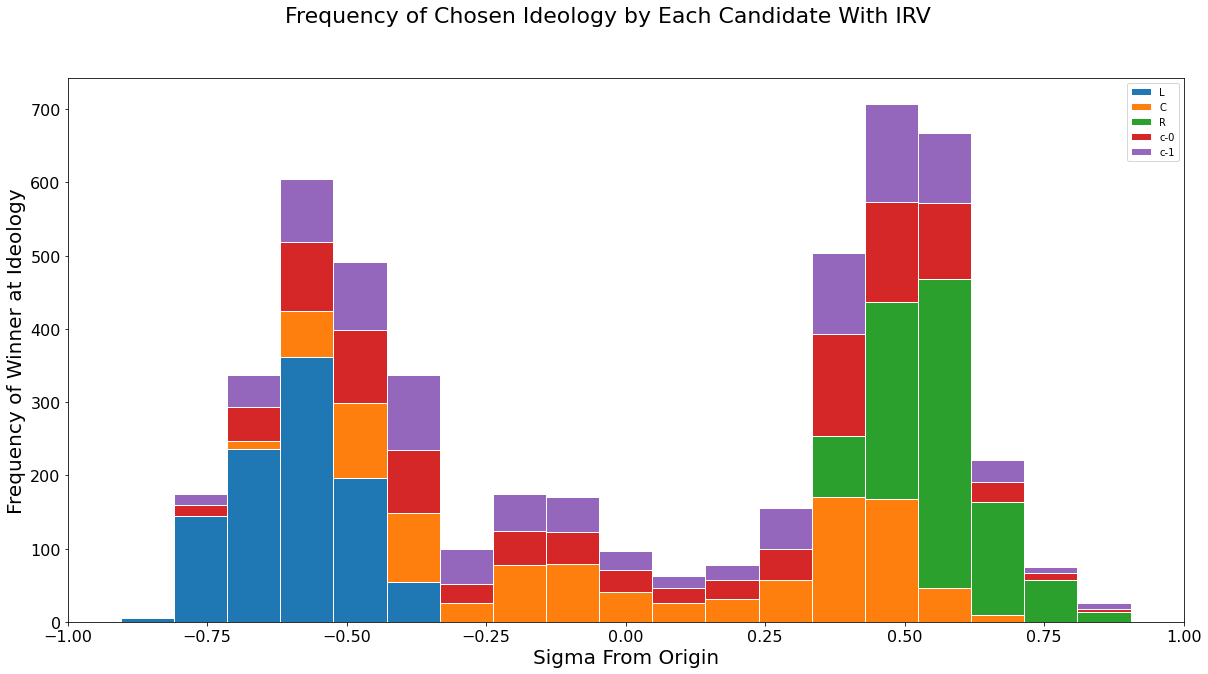

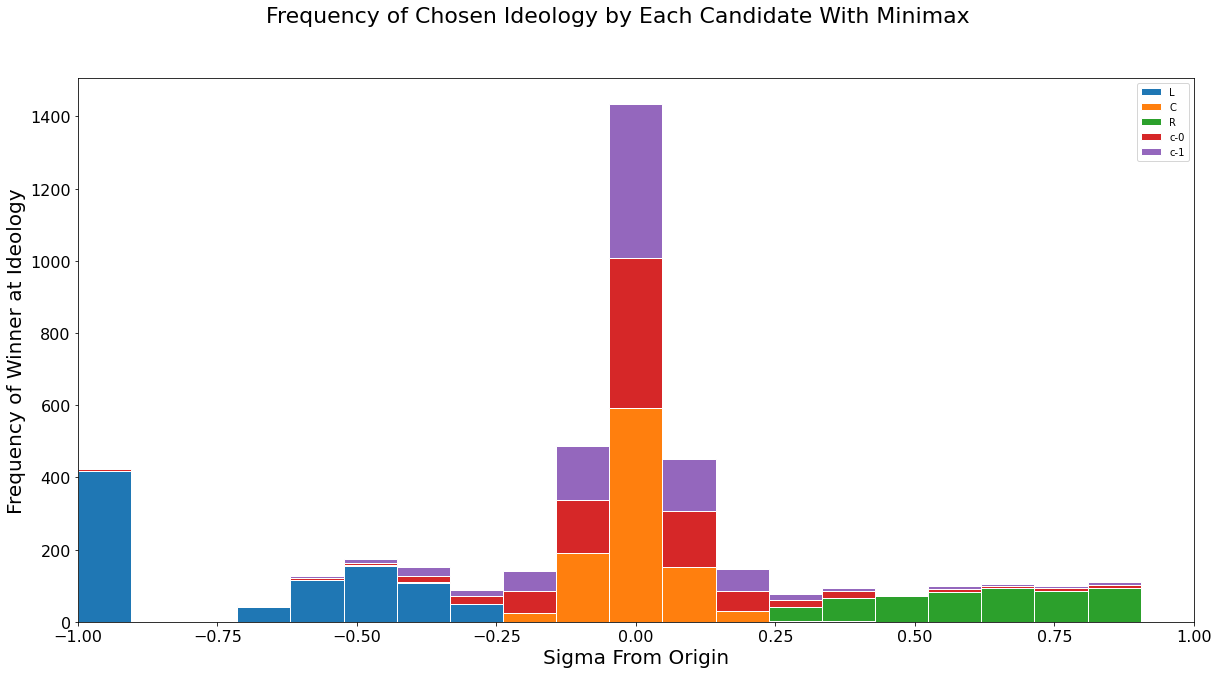

In [26]:
names = ["L", "C", "R", "c-0", "c-1"]
def make_plots():
    results = [results_for_candidate(irv_wc, n, True) for n in names]
    plot_results(results, f"Frequency of Winning Ideology by Each Candidate With IRV", names)
    plt.savefig("chosen_by_candidate_irv.png")

    results = [results_for_candidate(h2h_wc, n, True) for n in names]
    plot_results(results, f"Frequency of Winning Ideology by Each Candidate With Minimax", names)
    plt.savefig("chosen_by_candidate_irv.png")

    results = [results_for_candidate(irv_wc, n, False) for n in names]
    plot_results(results, f"Frequency of Chosen Ideology by Each Candidate With IRV", names)
    plt.savefig("wins_by_candidate_irv.png")

    results = [results_for_candidate(h2h_wc, n, False) for n in names]
    plot_results(results, f"Frequency of Chosen Ideology by Each Candidate With Minimax", names)
    plt.savefig("wins_by_candidate_h2h.png")

make_plots()